# Quasars


A quasar found by SDSS

One of the principal goals of the Sloan Digital Sky Survey is to find the most distant objects ever observed. The light from these distant objects has taken billions of years to reach us. So when we look at them, we are seeing them as they appeared billions of years ago. We are effectively looking backward in time. Looking at these objects can tell us about the early history of the universe.

<table width="125" align="right" border="1">
        <tbody><tr>
           <td align="center"><img src="imgs/qso07i.gif"></td>
        </tr>
           <tr><td align="center"><p class="caption">A quasar found by SDSS</p></td>
        </tr>
      </tbody></table>

But at such enormous distances, the only objects we can see at all are the very brightest objects. In this project, you will learn about the most distant, brightest objects in the universe: quasars. You will learn what they are, what provides their enormous power, and what they can tell us about the early universe.

## Early Radio Astronomy

In 1936, an amateur astronomer named Grote Reber built a radio telescope in his backyard. His was the first telescope ever built specifically to receive radio waves from the sky. Over the next several years, he pointed his telescope all over the sky, and discovered many new sources of radio waves. One of the sources he found, Cygnus A, would prove to change the course of modern astronomy.
Fifteen years later, in 1951, astronomers Walter Baade and Rudolph Minkowski found the object that created Cygnus A's radio emissions. They used the 200-inch visible-light telescope on Mount Palomar in California to find an unusual-looking galaxy. But when they looked at the spectrum of the galaxy, they found an even greater surprise.

<table width="221" align="left" border="1" cellpadding="0" cellspacing="0">
        <tbody><tr>
          <td><img src="imgs/reber-antenna.gif"></td>
        </tr>
        <tr>
          <td align="center"><p class="caption">Grote Reber's telescope, Wheaton, 
          Illinois, 1937<br><font size="-2">Image courtesy NRAO/AUI/NSF</font></p></td>
        </tr>
      </tbody></table>
      
Cygnus A turned out to be a galaxy with a redshift of 0.057. This redshift measurement put it over 700 million light years from Earth, the most distant object yet observed. For Reber to detect its radio source from 700 million light years away, Cygnus A had to be the most intense radio source ever seen.



As the years progressed, astronomers found more radio sources that corresponded to distant galaxies. Eventually, they started to find radio sources that appeared to correspond to stars! Stars are not a strong source of radio waves, so astronomers knew they were seeing something very unusual.

Let's take a look at some of these unusual objects.

<table width="273" align="right" border="1" cellpadding="0" cellspacing="0">
        <tbody><tr>
          <td><img src="imgs/cygnus-a.jpg"></td>
        </tr>
        <tr>
          <td align="center"><p class="caption">Cygnus A<br><font size="-2">Image 
          courtesy NRAO/AUI/NSF<br>Observers: P.A.G. Scheuer, R.A. Laing, R.A. Perley</font></p></td>
        </tr>
      </tbody></table>

## VLA FIRST Radio Survey

The Very Large Array (VLA), a network of 27 radio telescopes in the New Mexico desert, is one of the most sophisticated radio telescope arrays in the world. Right now, the VLA is conducting a sky survey called FIRST (Faint Images of the Radio Sky at Twenty-one centimeters). The FIRST Survey covers almost exactly the same area of the sky as the SDSS - so we can use FIRST to find radio sources that correspond to our data.

<table width="310" align="right" border="1" cellpadding="0" cellspacing="0">
        <tbody><tr>
          <td><img src="imgs/vla.gif"></td>
        </tr>
        <tr>
          <td align="center"><p class="caption">The Very Large Array (VLA)<br>
          <font size="-2">Photo courtesy <a target="offsite" href="http://www.aoc.nrao.edu/intro/image.index.html">AUI/NRAO</a></font></p></td>
        </tr>
      </tbody></table>

In [2]:
coords = [(0.2519,3.7791,-0.1336),
          (11.7010,175.5142,+0.8560),
          (11.7596,176.3938,-0.7274),
           (2.1786,32.6798,-0.3051)]

In [51]:
def decdeg2dms(dd):
    is_positive = dd >= 0
    dd = abs(dd)
    minutes,seconds = divmod(dd*3600,60)
    degrees,minutes = divmod(minutes,60)
    degrees = degrees if is_positive else -degrees
    if is_positive:
        return f"+%02d+%02d+%05.02f" % (degrees, minutes, seconds)
    else:
        return f"-%02d+%02d+%05.02f" % (degrees, minutes, seconds)

In [71]:
import os
import requests
baselink = "http://sundog.stsci.edu/cgi-bin/getopt?RA{}&Dec={}&ImageSize=3&ImageType=FITS%20Image"
def download_img(ra,dec):
    if os.path.exists(f'data/{ra}_{dec}.fits'):
        return
    tlink = baselink.format(ra,dec)
    r = requests.get(tlink)
    with open(f'data/{ra}_{dec}.fits', 'wb') as f:
        f.write(r.content)

In [72]:
for _,ra,dec in coords:
    r,d = decdeg2dms(ra),decdeg2dms(dec)
    download_img(r,d)

In [73]:
filenames = !ls data/*.fits

In [87]:
from astropy.io import fits
imgs = []
for f in filenames:
    try:
        hdu_list = fits.open(f)
        imgs.append(hdu_list[0].data)
    except:
        print("bad", f)

bad data/+175+30+51.12_+00+51+21.60.fits


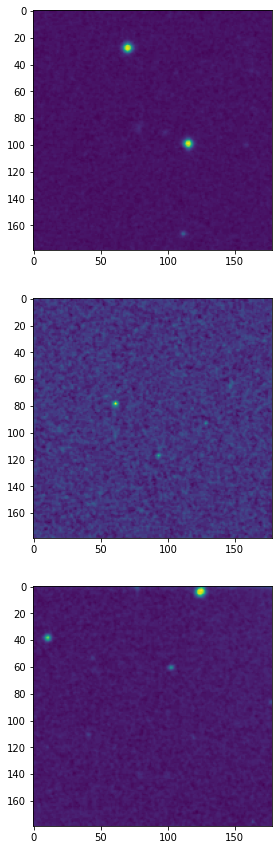

In [89]:
%notebook inline
import matplotlib.pyplot as plt
import numpy as np
fig,ax = plt.subplots(nrows=len(imgs),figsize=(5,len(imgs)*5))
for i,im in enumerate(imgs):
    ax[i].imshow(np.flipud(im))

<table class="question" width="600" cellpadding="5" cellspacing="0">      
        <tbody><tr>
          <td width="100%"><p><strong>Question 3.
          </strong> Below are three spectra. The first is the spectrum of a 
          typical star. The second is the spectrum of a typical galaxy. The third 
          is the spectrum of something else - an object like the ones you saw 
          in Exercise 1. 
          What are the differences between the first two spectra and the third? 
          What are some of the different emission and absorption 
          lines you see? Do they look like thermal radiation sources or 
          non-thermal radiation sources? Click on any of the images for a 
          full size version.</p>
          <p><b>Spectrum #1</b></p>
          <p><a href="imgs/star.gif" target="pictures">
          <img border="0" src="imgs/star_small.gif"></a></p>
          <p><b>Spectrum #2</b></p>
          <p><a href="imgs/galaxy.gif" target="pictures">
          <img border="0" src="imgs/galaxy_small.gif"></a></p>
          <p><b>Spectrum #3</b></p>
          <p><a href="imgs/quasar.gif" target="pictures">
          <img border="0" src="imgs/quasar_small.gif"></a></p>
         </td>
        </tr>
      </tbody></table>

## What are Quasars?


The arrow points to a quasar at redshift 6.2 discovered by SDSS

As you can see, the third spectrum differs greatly from the first two. It is the spectrum of a quasar.

Quasars are so far away that most look like single bright points in the sky - just like normal stars. This is why Photo usually classifies them as stars. To tell the difference between a very distant quasar and a relatively close star, you need to look at other things beside its image, such its colors or its spectrum.

The word "quasar" originally stood for "quasi-stellar radio source." Although quasars were originally discovered due to their radio emissions, only about 10% of quasars have substantial radio emissions. These quasars are now called radio loud quasars. Quasars without strong radio emissions are called radio quiet quasars. Researchers are still trying to determine what makes a quasar radio loud or radio quiet.

<table width="228" align="right" border="1">
        <tbody><tr>
          <td><img src="imgs/qso62.gif"></td>
        </tr>
        <tr>
          <td align="center">
          <p class="caption">The arrow points to a quasar at redshift 
          6.2 discovered by SDSS</p></td>
        </tr>
      </tbody></table>
      
All quasars have a substantial redshifts in their spectra. As you learned in the Hubble Diagram project, objects that move away from us have their light shifted toward the red end of the spectrum. The familiar spectral lines seen in most stars and galaxies are frequently redshifted too far into the infrared for us to see. Spectral lines that were too far in the ultraviolet for us to detect in nearby objects move into the visible portion of the spectrum of a quasar. You saw these lines in the quasar spectrum in Question 3.

Let's look at the spectra of some quasars and see how they vary.

In [90]:
# download function for dr16
import requests
link = "https://dr16.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid={}&mjd={}&fiberid={}"
def download_file(plate,mjd,fiber):
    print(plate,mjd,fiber)
    if os.path.exists(f'data/{plate}_{mjd}_{fiber}.fits'):
        return
    tlink = link.format(plate,mjd,fiber)
    print(tlink)
    r = requests.get(tlink)
    with open(f'data/{plate}_{mjd}_{fiber}.fits', 'wb') as f:
        f.write(r.content)

In [108]:
# create a function to load fits and return needed data
def get_spectrum_data(filename):
    star = fits.open(filename)
    table_spec = star[1].data 
    table_line = star[3].data
    spectrum = pd.DataFrame(table_spec.tolist(),columns=table_spec.columns.names) 
    wavelines = pd.DataFrame(table_line.tolist(),columns=table_line.columns.names)
    spectrum["lam"] = 10**spectrum["loglam"]
    xspec, yspec = np.array(spectrum["lam"]), spectrum["flux"]    
    pltwavelines = wavelines[wavelines["LINEWAVE"] > xspec.min()]
    pltwavelines = pltwavelines[pltwavelines["LINEWAVE"] < xspec.max()]
    lineName, lineValue,lineZ = pltwavelines["LINENAME"].tolist(), pltwavelines["LINEWAVE"].tolist(),pltwavelines["LINEZ"].tolist()
    return xspec,yspec,lineName, lineValue,lineZ

In [106]:
# create a function for plotting
from scipy.signal import savgol_filter
from matplotlib.pyplot import cm
import pandas as pd
def plot_spectrum(name,xpec,yspec,lineName,lineValue,ax):
    yspec = savgol_filter(yspec, 15, 5)
    
    minXSpec = xspec.min()
    maxXSpec = xspec.max()
    minYSpec = yspec.min()
    maxYSpec = yspec.max()
    
    # setting size of plot and limits
    #plt.gcf().set_size_inches((15,10))
    ax.set_xlim((minXSpec - 3, maxXSpec + 20))
    ax.set_ylim((minYSpec - 10, maxYSpec + 3))
    ax.set_title(name)

    # first plotting the spectrum
    ax.plot(xspec,yspec)

    # second plotting lines
    color = cm.Set1(np.linspace(0,1,len(lineName)))[::-1]
    ccount = 0
    for name, value in zip(lineName,lineValue):
        # in case the name was bytes
        name = name.decode("utf-8").strip() 

        # plotting the line
        ax.axvline(value,0,1,ls="solid",label=name,c=color[ccount])
        ccount+=1
    ax.legend()

In [91]:
coords = [
    (358,51818,504),
    (350,51691,73),
    (390,51818,537),
    (309,51666,556),
    (385,51783,492),
    (286,51999,183)
]

In [93]:
# downloading data
for f,g,b in coords:
    download_file(f,g,b)

358 51818 504
https://dr16.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid=358&mjd=51818&fiberid=504
350 51691 73
https://dr16.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid=350&mjd=51691&fiberid=73
390 51818 537
https://dr16.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid=390&mjd=51818&fiberid=537
309 51666 556
https://dr16.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid=309&mjd=51666&fiberid=556
385 51783 492
https://dr16.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid=385&mjd=51783&fiberid=492
286 51999 183
https://dr16.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid=286&mjd=51999&fiberid=183


In [110]:
# getting data
sky_server_data = []
for p,m,f in coords:
    try:
        xspec,yspec, lineName,lineWave,lineZ = get_spectrum_data(f"data/{p}_{m}_{f}.fits")
        sky_server_data.append((f"{p}_{m}_{f}",np.array(xspec),np.array(yspec), lineName,lineWave,lineZ))
    except:
        print(f"failed on data/{p}_{m}_{f}.fits")

failed on data/390_51818_537.fits


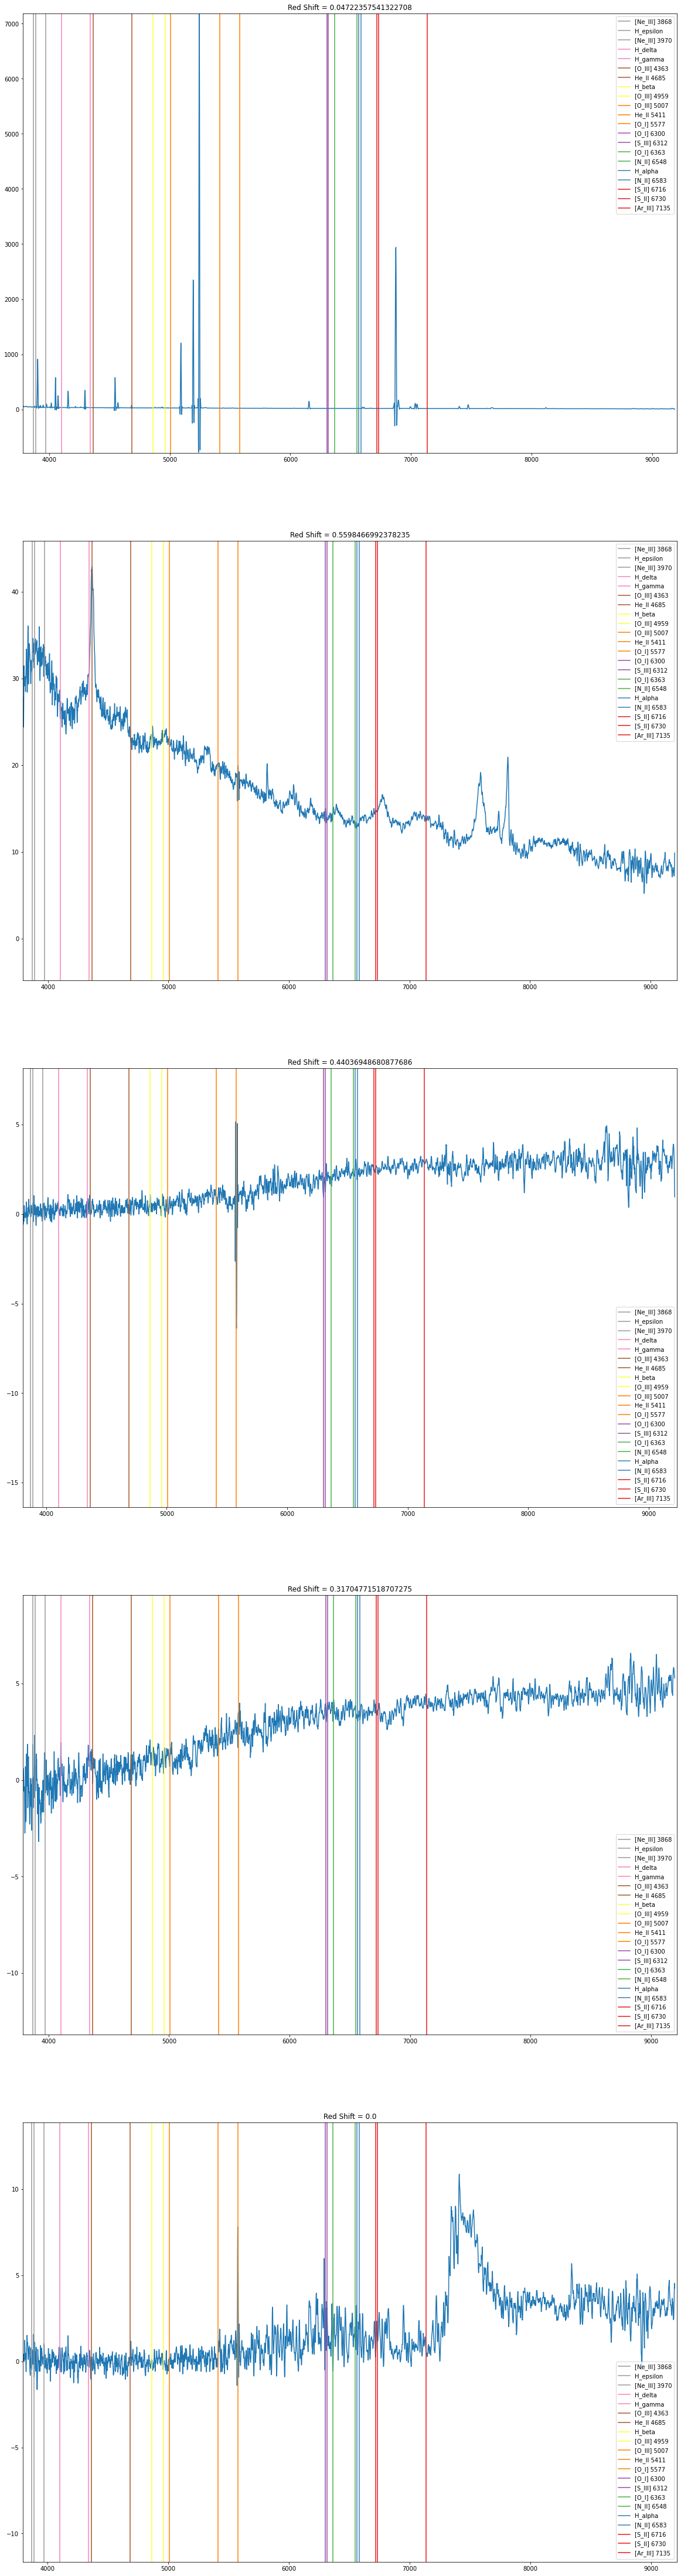

In [115]:
# plotting the spectrum
%matplotlib inline
fig,axs = plt.subplots(nrows=len(sky_server_data), ncols=1)
count = 0
for name,xspec,yspec, lineName,lineWave,lineZ in sky_server_data:
    plot_spectrum(name,xspec,yspec, lineName,lineWave, axs[count])
    axs[count].set_title(f"Red Shift = {max(lineZ)}")
    count += 1

fig.set_size_inches((20,80))

## The Power Source of Quasars

Quasars are by far the brightest objects in the universe. When astronomers first calculated the energy output of quasars, many of them didn't believe anything could emit that much energy. Some astronomers started looking for other explanations. Many people proposed that the redshifts did not indicate distance and were due to other causes. But further research eventually ruled out the alternative theories, leading most astronomers to conclude that quasars really are the most distant and luminous objects in the universe.

There are very few energy sources that produce enough energy to power a quasar. The possible source that best fits the observed properties of quasars is a supermassive black hole.

A black hole is a region of space from which nothing can escape, not even light. Small black holes result from the deaths of very massive stars. The black holes at the centers of quasars have masses of millions or even billions times our Sun's. Although the mass of a typical quasar black hole is very large, its radius is only about as large as our solar system. No one knows how these supermassive black holes come about; their origin is the subject of intense research.


A dust disk believed to circle a black hole in the galaxy NGC 7052
Image courtesy the Space Telescope Science Institute

At the center of a quasar, the black hole is surrounded by a large, rotating cloud of gas. As the gas falls into the black hole, it is heated up to millions of degrees. The gas emits thermal radiation due to its enormous heat. This thermal radiation spans the spectrum, making the quasar bright in the visible spectrum as well as x-rays.

There is a limit as to how bright a quasar can be, called the Eddington limit, which depends on the mass of the black hole. If too much gas falls into the black hole at once, the gas heats up and creates pressure. This pressure slows down the flow of gas, keeping the luminosity of the quasar below the Eddington limit.

One of the most important facts about quasars is that they are all very distant from us. The closest quasar is about 800 million light years away. Therefore, we can conclude that there are no quasars in the universe today and the last quasar disappeared about 800 million years ago.

Where did the quasars go? No one can say for sure. Given their power source, however, it is most likely that they simply ran out of fuel. The black holes eventually consumed all the gas and dust in the disk surrounding them, so the quasars ceased to shine.

Now, let's analyze some of the quasars found by the SDSS.


<table align="right" width="400" border="1">
        <tbody><tr>
          <td><img src="imgs/ngc7052.gif"></td>
        </tr>
        <tr>
          <td align="center"><p class="caption">A dust disk believed to circle a black hole in the galaxy 
          NGC 7052<br><font size="-2">Image courtesy the <a target="offsite" href="http://www.stsci.edu">Space Telescope Science Institute</a></font></p></td>
        </tr>
      </tbody></table>

## SDSS Quasars

The SDSS has found over a hundred thousand of quasars, including 26 of the 30 most distant quasars ever seen. Those quasars were been found in only the first few percent of the sky to be mapped!

To look at the properties of large numbers of quasars, you are going to use a search tool to retrieve information on a thousand quasars at once. The query tool uses a programming language called Structured Query Language (SQL) to retrieve the data. Don't worry - the next exercise gives you a sample query to get you started.

In [119]:
df = pd.read_csv("data/top1000quasars.csv")
df.head(5)

,objid,modelmag_u,modelmag_g,modelmag_r,modelmag_i,modelmag_z,z
0,1237660024494686312,19.53706,19.33001,19.26110,19.25599,19.04425,0.863151
1,1237663543150117358,21.22219,20.76472,20.37294,19.87774,19.90864,1.820907
2,1237663478724363112,23.40885,21.40734,20.39849,20.10683,19.86053,3.181853
3,1237656906345677139,21.40169,20.65387,20.22158,19.80401,19.62465,1.861428
4,1237660024494424268,19.83641,19.73237,19.50788,19.42897,19.47734,1.399138


You can analyze these quasars in many different ways using these magnitudes and redshifts. You can also study the quasars' spectra with the Object Explorer. The two projects on the next page let you do quasar analysis that was only recently published by the SDSS collaboration. The projects are a little advanced, but they reflect research that professional astronomers are doing right now!



In [126]:
df["g-r"] = round(df["modelmag_g"]-df["modelmag_r"],4)
df["r-i"] = round(df["modelmag_r"]-df["modelmag_i"],4)
df["u-g"] = round(df["modelmag_u"]-df["modelmag_g"],4)
df["i-z"] = round(df["modelmag_i"]-df["modelmag_z"],4)

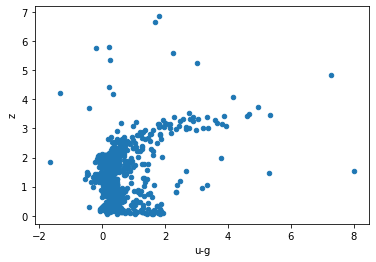

In [122]:
df.plot("u-g","z",kind="scatter")

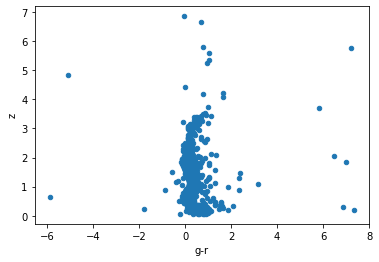

In [123]:
df.plot("g-r","z",kind="scatter")

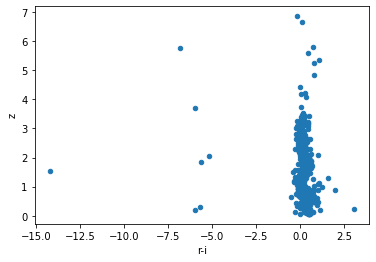

In [124]:
df.plot("r-i","z",kind="scatter")

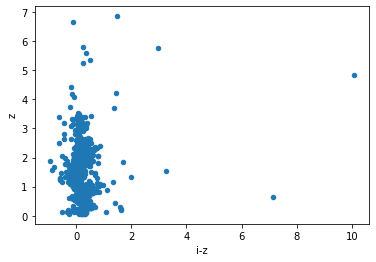

In [125]:
df.plot("i-z","z",kind="scatter")